# KAAN GÜNEY KEKLİKÇİ - 24986

In [1]:
# Multilayer Perceptron Classifier for MNIST dataset 

### **********************************
### *** Requirements for Multilayer Perceptron Classifier(MLP) ***
        - we need to scale our data between 0&1(that's how A-NN's work)
        - we need to export the data from files with .ubyte extension
        - we need to repeat this process for the following 4 files which are:
            - t10k-images-idx3-ubyte
            - t10k-labels-idx1-ubyte
            - train-images-idx3-ubyte
            - train-labels-idx1-ubyte
**********************************

In [2]:
# exporting the dataset from the above-mentioned files

In [6]:
import numpy as np # import necessary libraries 
import struct
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import sys as py_info

In [4]:
# implementing a function for extraction, data conversion and 

In [5]:
def read_and_convert():
    with open('./train-labels-idx1-ubyte', 'rb') as binary_file: # process the labels for the training sample
        binary_file.seek(0)  # return to the beginning of the file
        # Reading first 4 bytes to extract the magic number
        magic_number = binary_file.read(4)
        # unpacking couple_bytes as a 4byte signed integer with Big-endian Byte order
        train_magic_number = struct.unpack('>i',magic_number) 
        # print(magic_number)
        # unpacking next 4 bytes to extract the number of items
        nitems = binary_file.read(4)
        nitems = struct.unpack('>i',nitems)
        # print(nitems)
        # Next, we use np.fromfile to create an array from data in a binary file(var)
        train_labels = np.fromfile(binary_file, np.uint8) # labels are an unsigned byte --> np.uint8 
        # print (train_labels)
    with open('./train-images-idx3-ubyte', 'rb') as binary_file: # processing training images
        # reading the first 16 bytes: 
        # 4bytes: magic_number | 4bytes: # of images | 4bites: # of rows | 4bytes: # of cols
        data = binary_file.read(16) 
        magic_number, ntrimages, rows, cols = struct.unpack('>iiii', data)
        # print (magic_number, ntrimages, rows, cols)
        # extracting images and storing them into a numpy array (note that each image is stored as a vector, so we need to reshape it in the matrix form)
        train_images = np.fromfile(binary_file, np.uint8).reshape(ntrimages, rows, cols)
    with open('./t10k-labels-idx1-ubyte', 'rb') as binary_file:
        data = binary_file.read(8)
        magic_number, ntelabels = struct.unpack('>ii',data)
        # print (magic_number, ntelabels)
        test_labels = np.fromfile(binary_file, np.uint8) # reading the labels
    with open('./t10k-images-idx3-ubyte', 'rb') as binary_file:
        data = binary_file.read(16)
        magic_number, nteimages, rows, cols = struct.unpack('>iiii', data)
        # print (magic_number, nteimages, rows, cols)
        test_images = np.fromfile(binary_file, np.uint8).reshape(nteimages, rows, cols)
    return train_images, train_labels, ntrimages, test_images, test_labels, nteimages

In [6]:
train_images, train_labels, ntrimages, test_images, test_labels, nteimages = read_and_convert()                        

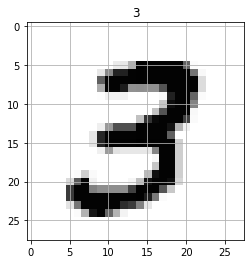

In [7]:
plt.imshow(train_images[7], cmap=cm.Greys) # print an example to see if correctly processed and converted 
plt.title(train_labels[7])
plt.grid()

*****************************************
### *** Before carrying on, check the sample sizes and row-column numbers for both sets *** 
    - training set(60K datapoints)
    - test set(10K datapoints)
*****************************************

In [8]:
print("Training data shape: ", train_images.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape: ", test_images.shape) # (10000, 28, 28) -- 10000 images, each 28x28

Training data shape:  (60000, 28, 28)
Test data shape:  (10000, 28, 28)


In [9]:
# flatten the images
# this means reduce dimensionality into a single vector for each attribute
# then compose these vectors and take the transpose to recreate the whole dataset in desired format

In [10]:
colsize = 28*28
train_images = train_images.reshape(train_images.shape[0], colsize)
test_images = test_images.reshape(test_images.shape[0], colsize)

In [11]:
# check to see if dimensions are now in desired format 
print("Training data new format: ", train_images.shape)
print("Test data shape: ", test_images.shape)

Training data new format:  (60000, 784)
Test data shape:  (10000, 784)


In [12]:
# now, I have created the matrices for both the training set and the test set
# column number is 784, row number is the sample size for each set

*****************************************
### *** IMPORTANT *** 
    - all elements of the array are now integers
    - if we keep up with the neural network like this, we will make a horrible mistake because
        - we are making predictions on categorical data
        - if we use numeric datapoints, we will obtain wrong results
    - let's address this with an example;
    - prediction:6 output:7 vs prediction:6 output:0
    - In our research, both are EQUALLY wrong because we simply guessed wrong pixel value, so our errors are same
    - if numeric, errors would be -1 and 6.
*****************************************

In [13]:
# let's check if we need to convert the elements to categorical data
print("Train dtype:",train_images.dtype, " Test dtype:",test_images.dtype)

Train dtype: uint8  Test dtype: uint8


In [14]:
# yes we do, because they are integer values

In [15]:
# to address this;
# we will encode single 1(hot-value) digits for every row and remain the other digits as 0s.
# in other words, we will use "one-hot encoded vector"

In [16]:
from tensorflow import keras  #  again import necessary libraries
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

In [17]:
# utilize the categorical changes here 
# here convert class vectors to binary but categorical matrices - CRUCIAL FOR ERROR CALCULATION
num_classes = 10 
train_labels = keras.utils.to_categorical(train_labels, num_classes) # y_train
test_labels = keras.utils.to_categorical(test_labels, num_classes) # y_test
# remark, now the labels are BINARY

In [18]:
# check the size to see if correctly converted
print("Train set-size:",train_labels.size, " Test set-size:",test_labels.size)

Train set-size: 600000  Test set-size: 100000


In [19]:
# futhermore, display a sample of 3 rows to see the hot-value for each row
print("The first 3 hot-values after conversion in each row are visible in the given matrix", train_labels[:3])

The first 3 hot-values after conversion in each row are visible in the given matrix [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [20]:
# now, the desired output vs real output could be eaxmined with respect to oour first set splits
# necessary conversions above made this possible so far

*****************************************
### *** ARCHITECTURE OF THE MODEL *** 
    - How many hidden layers? (2 in this case)
    - How many nodes in each layer? (300-100 and 100-50 resprectively for 2 tryouts)
    - Which activation function for each layer? (sigmoid and softmax)
    - The loss functions is chosen as categorical cross entropy.
    - SGD - (scholastic gradient descent) is our optimizer - "error decreaser"
*****************************************

In [21]:
# remark about softmax;
    # all values are between 0&1.
    # the sum of all ten values is 1.

- In machine learning, softmax is almost always used when the output is one-hot encoded vector.

In [22]:
# now, we can utilize a reusable function and then carry out the both try-outs 

In [23]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(colsize,), kernel_initalizer="uniform")) # only for input layer 
    
    for i in layer_sizes[1:]: # after the input layer 
        model.add(Dense(units=i, activation='sigmoid')) # no need to specify input parameter for hidden layers
    
    # now, for the output layer 
    model.add(Dense(units=num_classes, activation='softmax'))
    
    return model

In [24]:
def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)
    loss, accuracy  = model.evaluate(test_images, test_labels)

    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

### *** 300-100, 2 hidden layers, sigmoid and softmax activation functions, try-out 1 ***

In [33]:
model = create_dense([300, 100])
evaluate(model)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 2s 43us/sample - loss: 1.8007 - accuracy: 0.6068 - val_loss: 1.3326 - val_accuracy: 0.8110
Epoch 2/5
54000/54000 [==============================] - 2s 33us/sample - loss: 1.1059 - accuracy: 0.8185 - val_loss: 0.8419 - val_accuracy: 0.8762
Epoch 3/5
54000/54000 [==========

### *** Accuracy Results on Test&Validation for 300-100 try-out displayed above *** 

In [31]:
#################################################################################3

### *** 100-50, 2 hidden layers, sigmoid and softmax activation functions, try-out 2 ***

In [34]:
model = create_dense([100, 50]) 
evaluate(model)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_19 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 2s 29us/sample - loss: 2.0336 - accuracy: 0.5055 - val_loss: 1.7769 - val_accuracy: 0.7227
Epoch 2/5
54000/54000 [==============================] - 1s 23us/sample - loss: 1.5979 - accuracy: 0.7197 - val_loss: 1.3746 - val_accuracy: 0.8048
Epoch 3/5
54000/54000 [============

In [28]:
# now, accuracies and loss functions for both models have been calculated
# let's move on to the overall analysis

### ->Multilayer Perceptron Classifer Final Analysis
        
******************************************
- **WORKFLOW** :
******************************************
    - First, in order to make necessary conversions for the two separate MLP classifiers;
        - .gz extensions were unzipped, and with import of structs, MNIST dataset was assigned to;
            - x_train, x_test, y_train, y_test sets separately, of course with different names.
    - Then, since MNIST consists of 28*28 pixels, the datasets were reshaped using reshape().
    - colsizes were now 784 and rows were as much as the size of the samples.(i.e transpose matrices)
    - later, one-hot encoded vector was utilized in order to convert numeric values to categorical values, hence,
        - we would now obtain an accurate loss function.We are not calculating mathematical difference here,
            - we are simply checking if our prediction is on point or not.
    - All datapoints are binary at this point.
    - Now, we have come to the network architecture.
******************************************

******************************************
- **ARCHITECTURE & CALCULATIONS** :
******************************************
    - Here, I have created a virtual environment to install tensorflow, one of the four backends of Keras.
    - Then keras was imported from tensorflow.
    - MLP (multilayer perceptron) relies on different properties such as
        - nodes in a layer
        - how many layers
        - how many epochs 
        - batch sizes
        - activation functions and much more...
    - for the purposes of this work, I utilized sigmoid for layers except output layer,
        - and for output layer, softmax was utilized.(because one-hot encoded vector was used)
    - Others were assigned for the functions as hyperparameters, code is accesible above.
    - 300-100, try-out 1 had lower loss function value, so, higher accuracy compared to try-out 2 100-50.
    - All of this work is coded above but the idea is more important.
    
    !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    - SGD (scholastic gradient descent) was the common optimizer
    - categorical_crossentropy was the common loss function
    - metric was accuracy
    - Gradient descent determines how error changes as epochs work through with respect to every variable.
    - Derivative of errors with respect to weights by chain rule, gives this descent.
    - Subtraction of this rate of change from the weights to adjust the ANN's, optimizes the weights 
    to produce even better results.
    !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
******************************************
- **PERSONAL REMARK** :
******************************************
    - Around 90% accuracy and value of at most 0.72 considering both cases at loss functions are pretty good results.
    - If activation function sigmoid is changed to RELU, similar to hyperbolic tangent, maybe with more preprocessing,
    these accuracies could get very higher.
    - Overall, this MLP is doing good work.
******************************************

# HW3 finished ...